In [1]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import utils
from keras.layers import Conv2D, Conv2DTranspose, Input, Dense, Lambda, Reshape
from keras.models import Model, Sequential

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

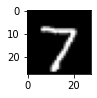

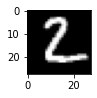

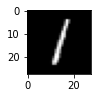

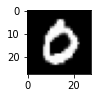

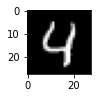

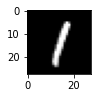

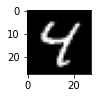

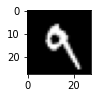

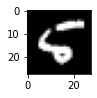

In [3]:
# Displaying images in test set
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(test_images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [4]:
# Converting image of shape 28*28 to 784 dimensional
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

# Converting data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')

# Scaling the data
train_data //=255
test_data //=255

# Changing the labels from integer to one-hot encoding
train_labels_oh= tf.keras.utils.to_categorical(train_labels)
test_labels_oh = tf.keras.utils.to_categorical(test_labels)

# Sequential Model

In [5]:
from keras import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape

# Network creation
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (dimData,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_oh, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_oh))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_oh)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 8s 30ms/step - loss: 1.7771 - accuracy: 0.3804 - val_loss: 1.6648 - val_accuracy: 0.4084
Epoch 2/20
235/235 [==============================] - 7s 28ms/step - loss: 1.6099 - accuracy: 0.4221 - val_loss: 1.6359 - val_accuracy: 0.4146
Epoch 3/20
235/235 [==============================] - 7s 28ms/step - loss: 1.5709 - accuracy: 0.4316 - val_loss: 1.6247 - val_accuracy: 0.4166
Epoch 4/20
235/235 [==============================] - 7s 28ms/step - loss: 1.5439 - accuracy: 0.4396 - val_loss: 1.6135 - val_accuracy: 0.4214
Epoch 5/20
235/235 [==============================] - 6s 28ms/step - loss: 1.5228 - accuracy: 0.4476 - val_loss: 1.6138 - val_accuracy: 0.4280
Epoch 6/20
235/235 [==============================] - 7s 29ms/step - loss: 1.5066 - accuracy: 0.4516 - val_loss: 1.6153 - val_accuracy: 0.4217
Epoch 7/20
235/235 [==============================] - 6s 28ms/step - loss: 1.4902 - accuracy: 0.4580 - val_loss: 1.6483 - val_accuracy: 0.4188

# Sequential model with tanh activation

Change the number of hidden layers and the activation to tanh or elu and report if accuracy changes.


In [6]:
model1 = Sequential()
model1.add(Dense(512, activation = 'tanh', input_shape = (dimData,)))
model1.add(Dense(256, activation = 'tanh'))
model1.add(Dense(10, activation = 'softmax'))


model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_data, train_labels_oh, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_oh))

[test_loss, test_acc] = model1.evaluate(test_data, test_labels_oh)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 6s 23ms/step - loss: 1.7701 - accuracy: 0.3791 - val_loss: 1.6814 - val_accuracy: 0.3920
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 1.6565 - accuracy: 0.4060 - val_loss: 1.6648 - val_accuracy: 0.4023
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6356 - accuracy: 0.4098 - val_loss: 1.6447 - val_accuracy: 0.4089
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6215 - accuracy: 0.4144 - val_loss: 1.6468 - val_accuracy: 0.4039
Epoch 5/20
235/235 [==============================] - 5s 22ms/step - loss: 1.6123 - accuracy: 0.4152 - val_loss: 1.6378 - val_accuracy: 0.4111
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 1.6038 - accuracy: 0.4177 - val_loss: 1.6369 - val_accuracy: 0.4084
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 1.5953 - accuracy: 0.4207 - val_loss: 1.6298 - val_accuracy: 0.4120

# Sequential model with elu activation

In [7]:
model2 = Sequential()
model2.add(Dense(512, activation = 'elu', input_shape = (dimData,)))
model2.add(Dense(256, activation = 'elu'))
model2.add(Dense(10, activation = 'softmax'))


model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_data, train_labels_oh, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_oh))

[test_loss, test_acc] = model2.evaluate(test_data, test_labels_oh)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 1.7829 - accuracy: 0.3776 - val_loss: 1.6838 - val_accuracy: 0.4033
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6566 - accuracy: 0.4056 - val_loss: 1.6625 - val_accuracy: 0.4039
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6331 - accuracy: 0.4089 - val_loss: 1.6505 - val_accuracy: 0.4059
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6190 - accuracy: 0.4149 - val_loss: 1.6438 - val_accuracy: 0.4053
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6064 - accuracy: 0.4153 - val_loss: 1.6368 - val_accuracy: 0.4109
Epoch 6/20
235/235 [==============================] - 6s 23ms/step - loss: 1.5973 - accuracy: 0.4209 - val_loss: 1.6360 - val_accuracy: 0.4098
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 1.5894 - accuracy: 0.4205 - val_loss: 1.6342 - val_accuracy: 0.4117

# Loss and Accuracy

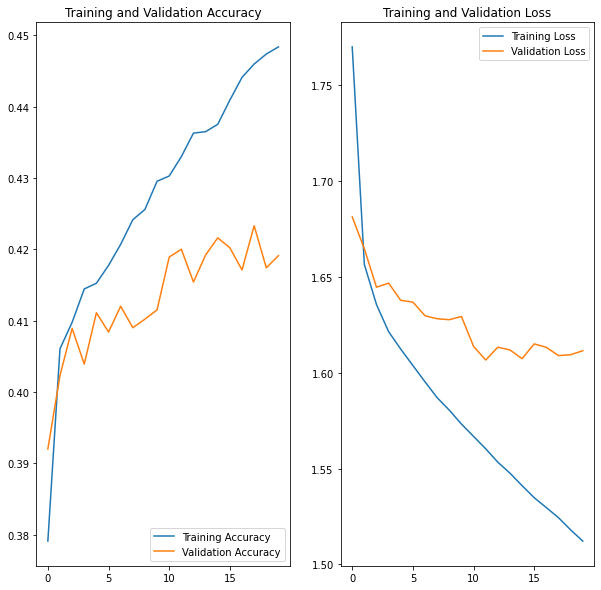

In [8]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss= history1.history['loss']
val_loss=history1.history['val_loss']


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#No Scaling

In [9]:
dimData = np.prod(train_images.shape[1:])
train_data_wos = train_images.reshape(train_images.shape[0],dimData)
test_data_wos = test_images.reshape(test_images.shape[0],dimData)

train_data_wos.astype('float')
test_data_wos.astype('float')

train_labels_oh_wos= tf.keras.utils.to_categorical(train_labels)
test_labels_oh_wos = tf.keras.utils.to_categorical(test_labels)

model3 = Sequential()
model3.add(Dense(512, activation = 'relu', input_shape = (dimData,)))
model3.add(Dense(512, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))


model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_data_wos, train_labels_oh_wos, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data_wos, test_labels_oh_wos))

[test_loss, test_acc] = model3.evaluate(test_data_wos, test_labels_oh_wos)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 7s 29ms/step - loss: 1.7777 - accuracy: 0.3790 - val_loss: 1.6717 - val_accuracy: 0.4027
Epoch 2/20
235/235 [==============================] - 7s 30ms/step - loss: 1.6098 - accuracy: 0.4198 - val_loss: 1.6470 - val_accuracy: 0.4069
Epoch 3/20
235/235 [==============================] - 7s 28ms/step - loss: 1.5692 - accuracy: 0.4338 - val_loss: 1.6274 - val_accuracy: 0.4138
Epoch 4/20
235/235 [==============================] - 7s 29ms/step - loss: 1.5437 - accuracy: 0.4397 - val_loss: 1.6336 - val_accuracy: 0.4123
Epoch 5/20
235/235 [==============================] - 7s 30ms/step - loss: 1.5231 - accuracy: 0.4457 - val_loss: 1.6262 - val_accuracy: 0.4204
Epoch 6/20
235/235 [==============================] - 7s 30ms/step - loss: 1.5056 - accuracy: 0.4510 - val_loss: 1.6173 - val_accuracy: 0.4253
Epoch 7/20
235/235 [==============================] - 13s 54ms/step - loss: 1.4902 - accuracy: 0.4568 - val_loss: 1.6345 - val_accuracy: 0.421

# Functional API

In [10]:
from keras.models import Model

input_layer = Input((dimData,))
Layer_1 = Dense(256, activation="relu")(input_layer)
Layer_2 = Dense(256, activation="relu")(Layer_1)
output_layer= Dense(10, activation="linear")(Layer_2)

# Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)

# defining the optimiser and loss function
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

# training the model
model.fit(train_data, train_labels_oh, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_oh))

Epoch 1/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0767 - accuracy: 0.3720 - val_loss: 0.0733 - val_accuracy: 0.4048
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0710 - accuracy: 0.4214 - val_loss: 0.0713 - val_accuracy: 0.4132
Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0693 - accuracy: 0.4344 - val_loss: 0.0706 - val_accuracy: 0.4172
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0682 - accuracy: 0.4412 - val_loss: 0.0703 - val_accuracy: 0.4286
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0674 - accuracy: 0.4494 - val_loss: 0.0705 - val_accuracy: 0.4233
Epoch 6/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0667 - accuracy: 0.4536 - val_loss: 0.0701 - val_accuracy: 0.4275
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0662 - accuracy: 0.4595 - val_loss: 0.0700 - val_accuracy: 0.4248

In [11]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_oh)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.4230
Evaluation result on Test Data : Loss = 0.0708935335278511, accuracy = 0.4230000078678131


# 5. Inferencing



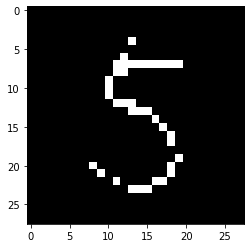

In [12]:
# Plotting a image in the test data
pyplot.imshow(test_images[153], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [13]:
# Prediction of the model 
img = test_data[153]
test_img = img.reshape((1,784))

# Predict gives vector of probabilities and np.argmax gives argmax of that vector
img_class = np.argmax(model1.predict(test_img), axis=-1)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  5


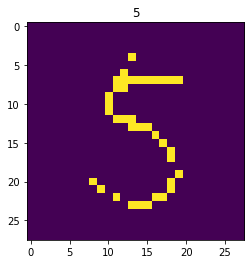

In [14]:
# Predicted class
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

# Sparce categorical cross entropy

In [15]:
from keras import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape

model5 = Sequential()
model5.add(Dense(512, activation = 'relu', input_shape = (dimData,)))
model5.add(Dense(512, activation = 'relu'))
model5.add(Dense(10, activation = 'softmax'))

model5.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history5 = model5.fit(train_data, train_labels, batch_size=100, epochs=20, verbose=1, validation_data=(test_data, test_labels))

[test_loss, test_acc] = model5.evaluate(test_data, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 9s 15ms/step - loss: 1.7453 - accuracy: 0.3822 - val_loss: 1.6421 - val_accuracy: 0.4132
Epoch 2/20
600/600 [==============================] - 8s 14ms/step - loss: 1.5881 - accuracy: 0.4258 - val_loss: 1.6249 - val_accuracy: 0.4116
Epoch 3/20
600/600 [==============================] - 8s 14ms/step - loss: 1.5438 - accuracy: 0.4388 - val_loss: 1.6127 - val_accuracy: 0.4184
Epoch 4/20
600/600 [==============================] - 9s 14ms/step - loss: 1.5124 - accuracy: 0.4459 - val_loss: 1.6166 - val_accuracy: 0.4201
Epoch 5/20
600/600 [==============================] - 8s 14ms/step - loss: 1.4862 - accuracy: 0.4547 - val_loss: 1.6307 - val_accuracy: 0.4214
Epoch 6/20
600/600 [==============================] - 8s 14ms/step - loss: 1.4632 - accuracy: 0.4624 - val_loss: 1.6225 - val_accuracy: 0.4257
Epoch 7/20
600/600 [==============================] - 8s 14ms/step - loss: 1.4470 - accuracy: 0.4672 - val_loss: 1.6272 - val_accuracy: 0.4249
Epoch 8/20

In [16]:
# Numpy method called "np.argmax()" ( for printing the class from the model prediction)

img = test_data[153]
test_img = img.reshape((1,784))

# Predict method will give a vector of probabilities and then np.argmax gives the argmax of this vector
img_class = np.argmax(model5.predict(test_img), axis=-1)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  8


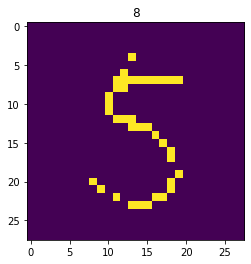

In [17]:
#Displaying the predicted class
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()